In [1]:
from data.data import load_data,save_data
from data.analysis.summary import summary
import matplotlib.pyplot as plt
import numpy as np
df_01 = load_data()

In [2]:
def fractofloat(x):
    
    try:
        x,y = x.split('/')
        return float(x)/float(y)
    except:
        return np.nan
    
def sandtomin(x,ind):
    try:
        x,y = x.split('-')
        if ind == 0:
            return float(x)
        else:
            return float(y)
    except:
        return 0
    
df_01["L/D"] = df_01["L/D"].apply(fractofloat)
df_01["Sand size min (um)"] = df_01["Sand size (um)"].apply(lambda x: sandtomin(x,1))
df_01["Sand size max (um)"] = df_01["Sand size (um)"].apply(lambda x: sandtomin(x,0))

# pop 
df_01.pop("Sand size (um)")

0          NaN
1      500-850
2      500-850
3      500-850
4      500-850
        ...   
417    355-500
418    355-500
419    355-500
420    355-500
421    355-500
Name: Sand size (um), Length: 422, dtype: object

In [3]:
summary(df_01)

Data Summary:
Number of rows: 	 	422
Number of columns: 	 	34
Total missing values: 		1761 from 14348 cells
Rows with missing values: 	385
% of rows with missing values: 	91.23%
Percentage of missing values: 	12.27%


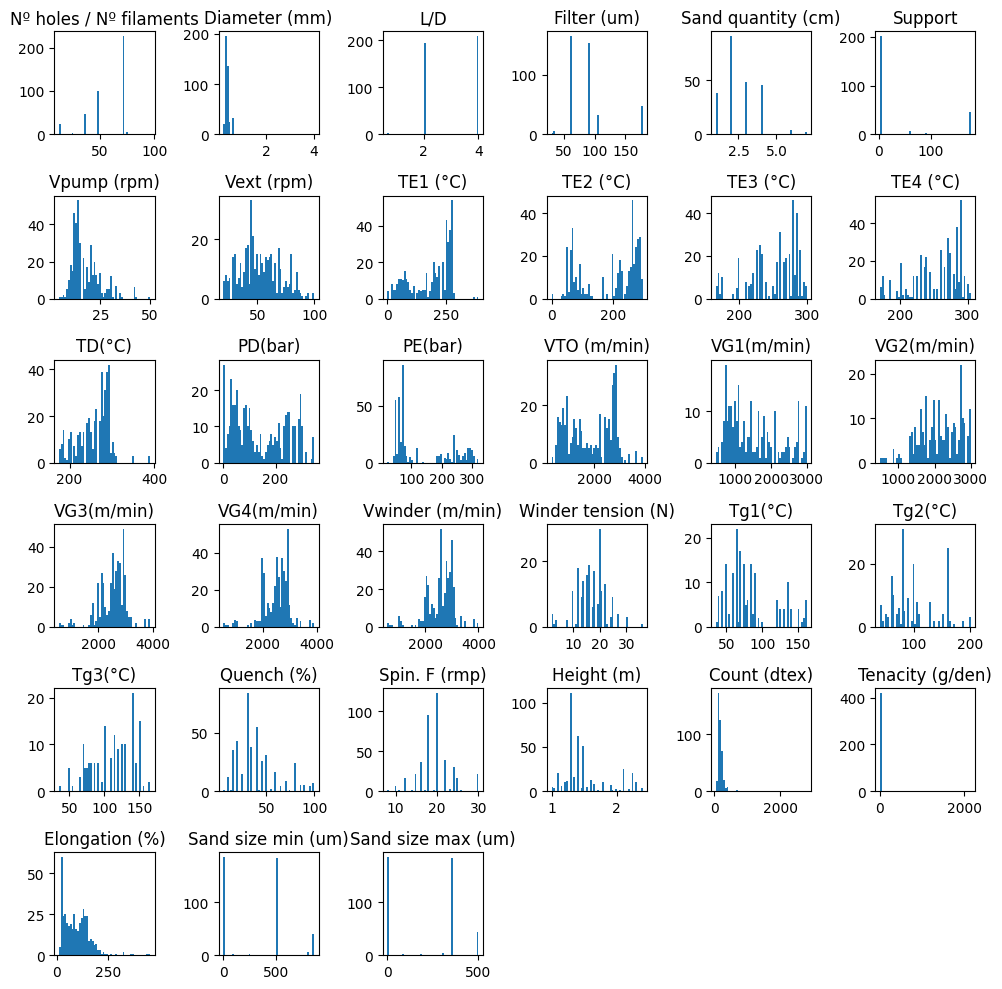

In [4]:
df_01.hist(figsize=(10, 10), bins=50, grid=False);
plt.tight_layout()

In [5]:
# Define a function to remove outliers based on standard deviation
def remove_outliers_std(data, columns, threshold=5):
    for col in columns:
        mean = data[col].mean()
        std_dev = data[col].std()
        data = data[(data[col] >= mean - threshold * std_dev) & (data[col] <= mean + threshold * std_dev)]
    return data

# Apply outlier removal on 'PERF_Tenacity(g/den)' and 'PERF_Elongation (pc)' based on 3 standard deviations
df_02 = remove_outliers_std(df_01, ['Tenacity (g/den)', 'Elongation (%)',"Count (dtex)","Diameter (mm)"])



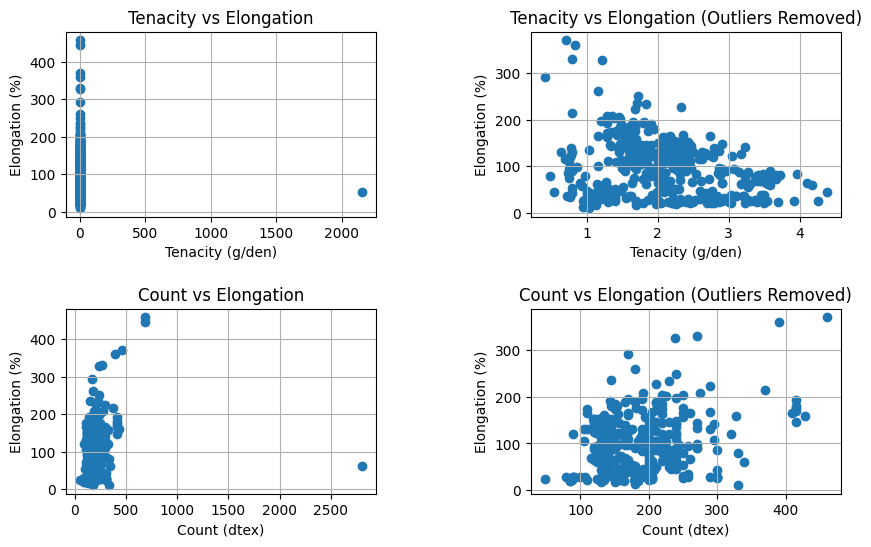

In [6]:

# Plot the cleaned data for comparison
plt.figure(figsize=(10, 6))
# padding
plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.subplot(2, 2, 1)
plt.scatter(df_01['Tenacity (g/den)'], df_01['Elongation (%)'])
plt.title("Tenacity vs Elongation")
plt.xlabel("Tenacity (g/den)")
plt.ylabel("Elongation (%)")
plt.grid(True)

plt.subplot(2, 2, 2)
# Plot the cleaned data for comparison
plt.scatter(df_02['Tenacity (g/den)'], df_02['Elongation (%)'])
plt.title("Tenacity vs Elongation (Outliers Removed)")
plt.xlabel("Tenacity (g/den)")
plt.ylabel("Elongation (%)")
plt.grid(True)

plt.subplot(2, 2, 3)
plt.scatter(df_01['Count (dtex)'], df_01['Elongation (%)'])
plt.title("Count vs Elongation")
plt.xlabel("Count (dtex)")
plt.ylabel("Elongation (%)")
plt.grid(True)

plt.subplot(2, 2, 4)
# Plot the cleaned data for comparison
plt.scatter(df_02['Count (dtex)'], df_02['Elongation (%)'])
plt.title("Count vs Elongation (Outliers Removed)")
plt.xlabel("Count (dtex)")
plt.ylabel("Elongation (%)")

plt.grid(True)



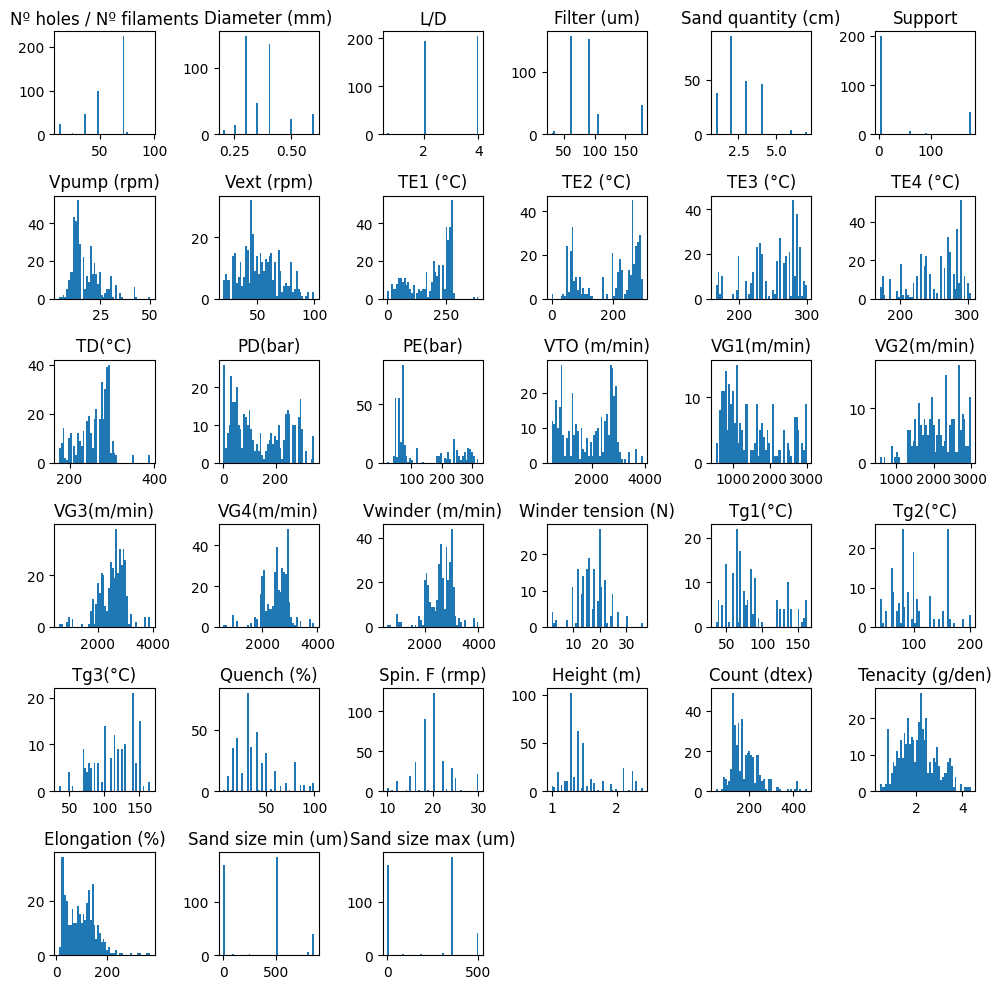

In [7]:
df_02.hist(figsize=(10, 10), bins=50, grid=False);
plt.tight_layout()

In [8]:
print("DF 01 Summary:" + "\n" + 50* "-")
summary(df_01)
print("\n")
print("DF 02 Summary:" + "\n" + 50* "-")
summary(df_02)

DF 01 Summary:
--------------------------------------------------
Data Summary:
Number of rows: 	 	422
Number of columns: 	 	34
Total missing values: 		1761 from 14348 cells
Rows with missing values: 	385
% of rows with missing values: 	91.23%
Percentage of missing values: 	12.27%


DF 02 Summary:
--------------------------------------------------
Data Summary:
Number of rows: 	 	404
Number of columns: 	 	34
Total missing values: 		1642 from 13736 cells
Rows with missing values: 	368
% of rows with missing values: 	91.09%
Percentage of missing values: 	11.95%


In [9]:
# Nan -> 0
df_02["Sand quantity (cm)"] = df_02["Sand quantity (cm)"].fillna(0)

In [10]:
save_data(df_02, "01")

Data saved to /home/djoroya/AITEX_DATAMODEL/src/data/AITEX_01.csv
